## Generative Model (GANs)
- Discriminative models (classifier) distinguishes between classes
- Discriminative models : P(Y|X) = X (Features) -> Y (Classes)
- Generative models learn to produce example : P(Y|X) = E(Noise), Y (Class) -> X (Features)

## Intuition betweeen GANs
- The generator's goal is to fool the discriminator
- The discriminator's goal is to distinguish between real and fake
- They learn from the competition with each other
- In the end, fakes look real

## Discriminator
- Discriminator is a classifier
- It learns the probability of class Y (real or fake) given features X
- The probabilities are the feedback for the generator
- As image classifier, distinguishes between classes 
<br>
<br> Discriminator as Image Classifier (During Training) <br>
<br>
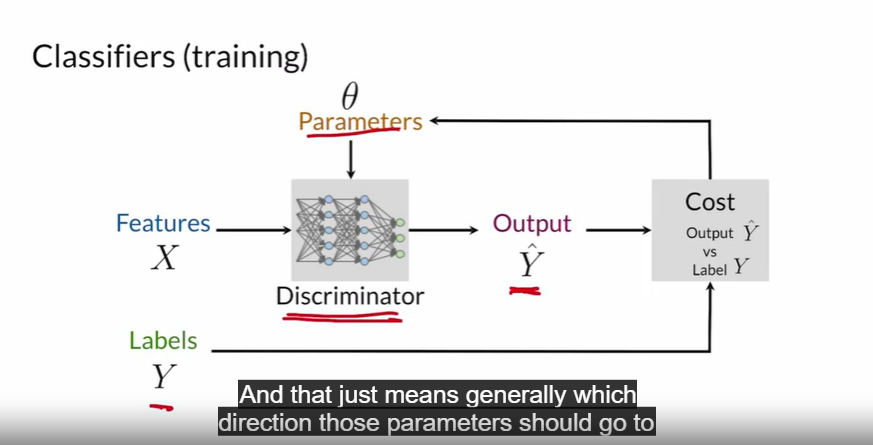

<br>
<br> The modeling the probability of class Y given input features X <br>
<br>

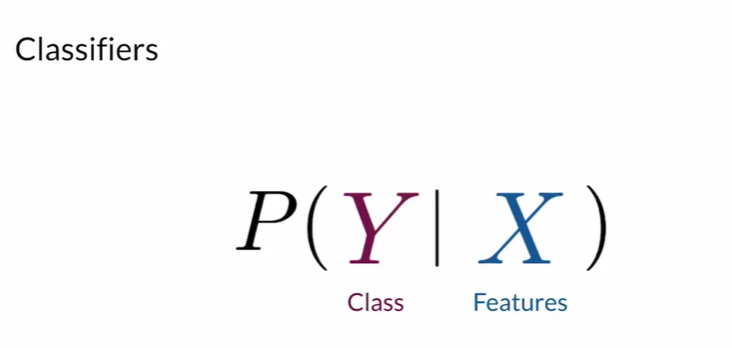
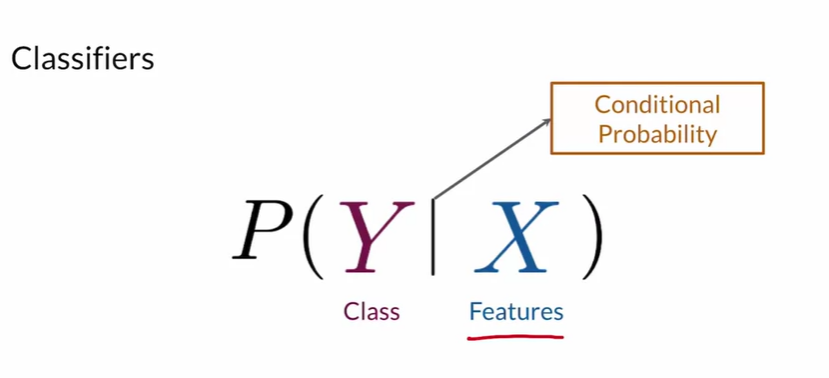

<br>
<br> In probabilistic terms, the discriminator models the probability of an example being fake given a set of inputs X
<br>

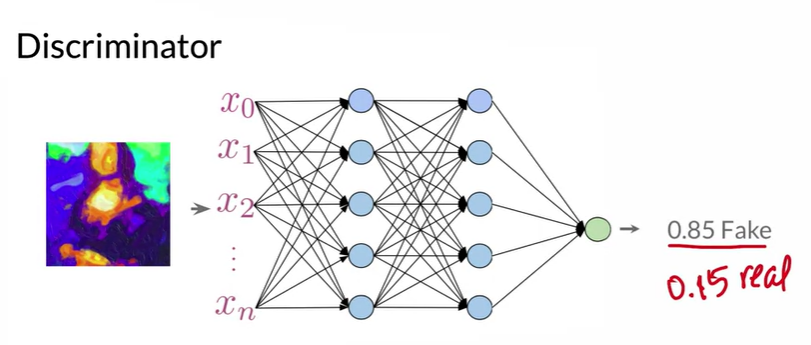

## Generator
- The generator produces fake data
- It learns the probability of features X
- THe generator takes as input noise (random features)

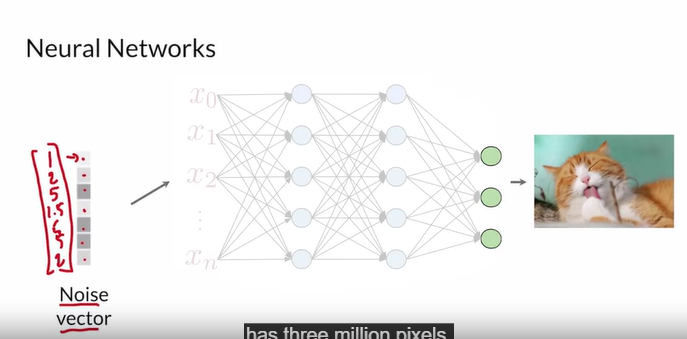

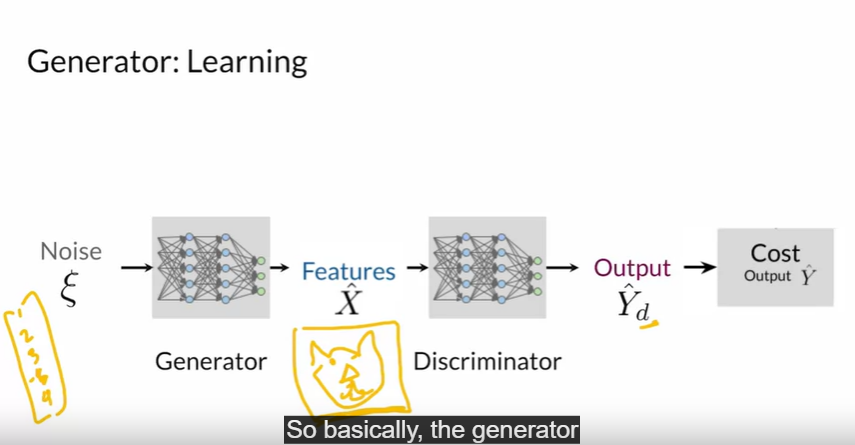

## BCE
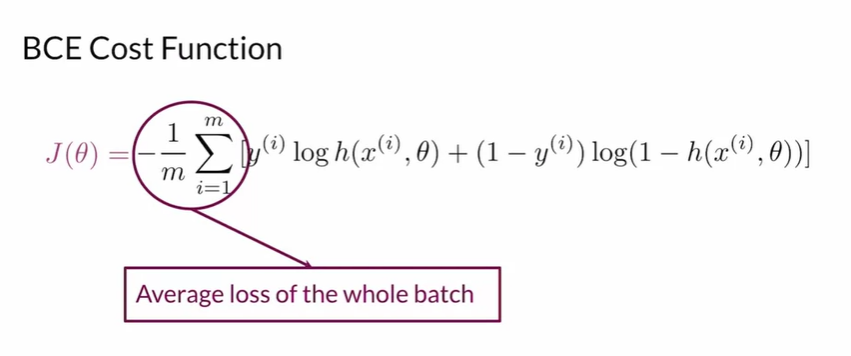
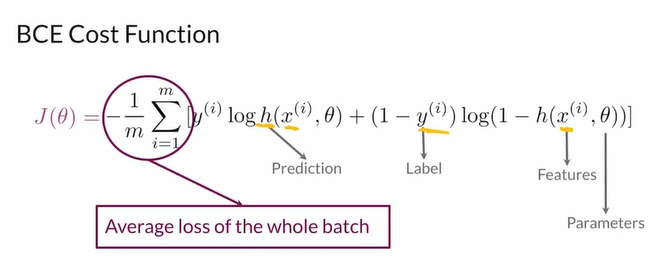
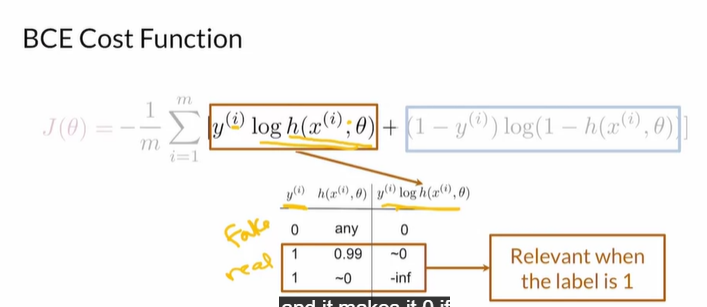
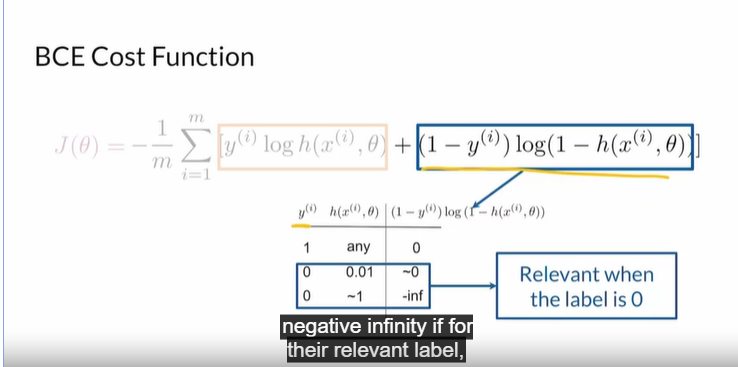
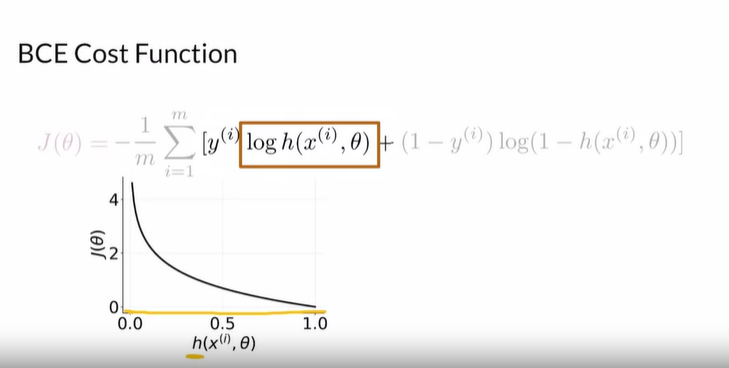

## BCE Cost function summary:
- The BCE cost function has two parts (one relevant for each class)
- Close to zero when the label and the predicition are similar
- Approaches infinity when the label and the prediction are different

## Putting It All together
- How the whole architecture looks
- How to train GANs
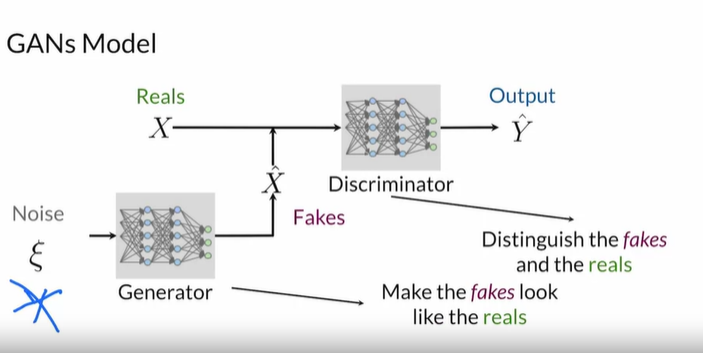
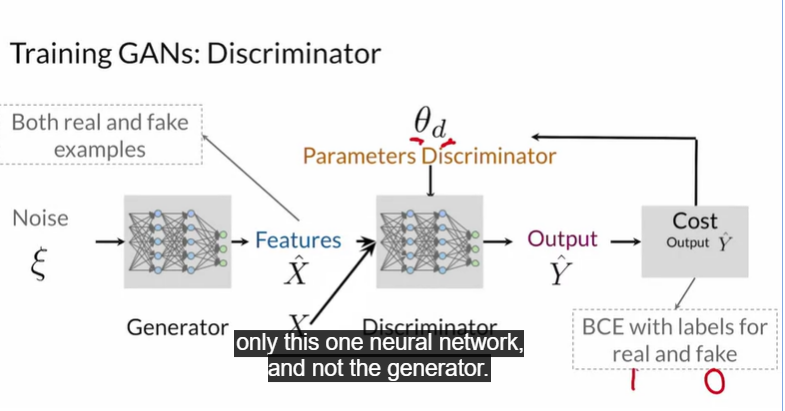
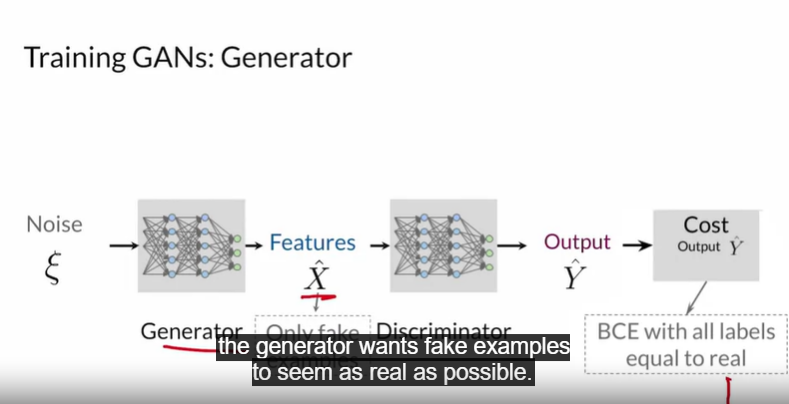
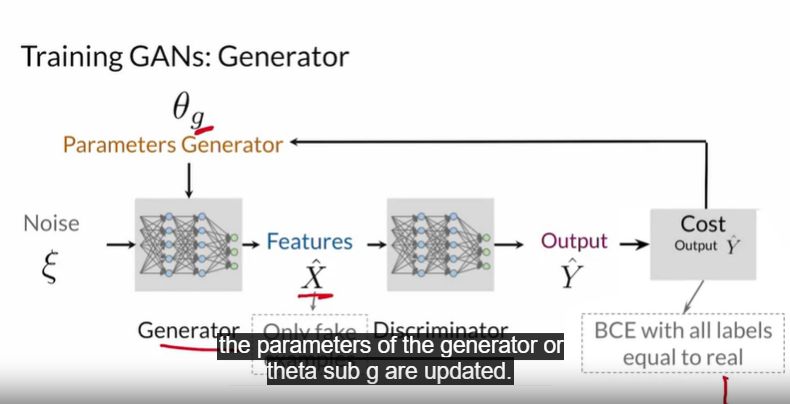
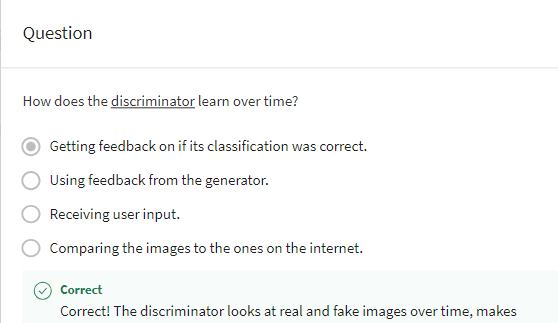
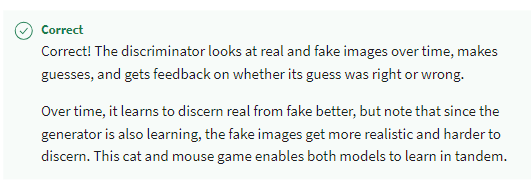
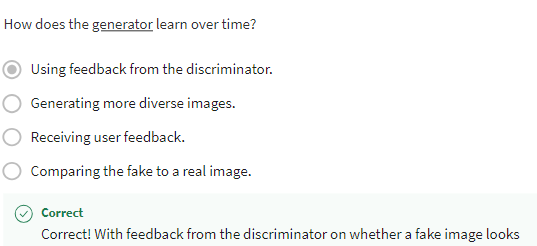
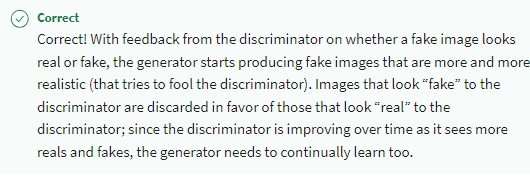

## Pytorch Lab

In [2]:
!pip3 install torch torchvision numpy opencv-python matplotlib Pillow

You should consider upgrading via the 'C:\Users\Lim Jin Bing\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip3 install torch torchvision

You should consider upgrading via the 'C:\Users\Lim Jin Bing\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
!python --version
!pip list

Python 3.9.7
Package                            Version


You should consider upgrading via the 'C:\Users\Lim Jin Bing\anaconda3\python.exe -m pip install --upgrade pip' command.


---------------------------------- --------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.2
anyio                              3.5.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.6.0
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0

In [5]:
import torch

protobuf                           3.19.1
psutil                             5.8.0
ptyprocess                         0.7.0
py                                 1.11.0
pyasn1                             0.4.8
pyasn1-modules                     0.2.8
pycodestyle                        2.7.0
pycosat                            0.6.3
pycparser                          2.21
pycurl                             7.44.1
pydocstyle                         6.1.1
pyerfa                             2.0.0
pyflakes                           2.3.1
Pygments                           2.11.2
PyJWT                              2.1.0
pylint                             2.9.6
pyls-spyder                        0.4.0
PyNaCl                             1.4.0
pyodbc                             4.0.0-unsupported
pyOpenSSL                          21.0.0
pyparsing                          3.0.4
pyreadline                         2.1
pyrsistent                         0.18.0
PySocks                            1.7.1
p

In [6]:
example_tensor = torch.Tensor(
    [
        [[1,2], [3,4]],
        [[5,6],[7,8]],
         [[9, 0], [1, 2]]
    ]
)

In [7]:
example_tensor.shape

torch.Size([3, 2, 2])

In [8]:
example_tensor.device

device(type='cpu')

In [9]:
print("shape[0] =", example_tensor.shape[0])
print("size(1) =", example_tensor.size(1))

shape[0] = 3
size(1) = 2


In [10]:
print("Rank =", len(example_tensor.shape))
print("Number of elements =", example_tensor.numel())

Rank = 3
Number of elements = 12


In [12]:
import torch.nn as nn
## nn.Linear
linear = nn.Linear(10,2) ## take in nx10 Matrix and return nx12 matrix
example_input = torch.randn(3,10)
example_output = linear(example_input) ## output (3,10)
example_output.shape

torch.Size([3, 2])

In [13]:
# nn.RELU() -> a ReLU activation function
relu = nn.ReLU()
relu_output = relu(example_output)
relu_output

tensor([[0.4888, 1.1985],
        [0.0000, 0.1831],
        [0.3204, 0.0066]], grad_fn=<ReluBackward0>)

In [16]:
## torch.nn.BatchNorm1d
batchnorm = nn.BatchNorm1d(2)
batchnorm_output = batchnorm(relu_output)
batchnorm_output

tensor([[ 1.0804,  1.4008],
        [-1.3302, -0.5324],
        [ 0.2498, -0.8684]], grad_fn=<NativeBatchNormBackward0>)

In [18]:
#torch.nn.Sequential
mlp_layer = torch.nn.Sequential(
    torch.nn.Linear(5,2),
    torch.nn.BatchNorm1d(2),
    torch.nn.ReLU()
)

test_example = torch.randn(5,5) + 1
print("input: ")
print(test_example)
print("output: ")
print(mlp_layer(test_example))

input: 
tensor([[ 0.9597,  1.0557,  0.5916,  1.0267, -1.0134],
        [ 3.9000,  0.9677,  1.8282,  0.7672, -0.0730],
        [ 1.3467,  0.8155,  1.2995,  0.0154,  0.0354],
        [ 0.0675,  1.9119,  1.9457,  1.7268, -0.1101],
        [ 0.6129,  0.7427,  0.9025,  0.3046,  1.6053]])
output: 
tensor([[0.9034, 0.0000],
        [0.3868, 0.0000],
        [0.0210, 0.0000],
        [0.6041, 0.4223],
        [0.0000, 1.7111]], grad_fn=<ReluBackward0>)


## Optimization (torch.optim) -> automatic differentatiin library

# Training Loop:
# A (basic) training step in PyTorch consists of 4 basic parts:
1. Set all of the gradients to zero using opt.zero_grad()
2. Calculate the loss, loss
3. Calculate the gradients with respect to the loss using loss.backward()
4. Update the parameters being optimized using opt.step()

In [19]:
import torch.optim as optim
adam_opt = torch.optim.Adam(mlp_layer.parameters(), lr=1e-1)

## Training Loop:
## A (basic) training step in PyTorch consists of 4 basic parts:
# 1. Set all of the gradients to zero using opt.zero_grad()
# 2. Calculate the loss, loss
# 3. Calculate the gradients with respect to the loss using loss.backward()
# 4. Update the parameters being optimized using opt.step()

train_example = torch.randn(100,5)+1
adam_opt.zero_grad()
cur_loss = torch.abs(1-mlp_layer(train_example)).mean()
cur_loss.backward()
adam_opt.step()
print(cur_loss)


tensor(0.7697, grad_fn=<MeanBackward0>)


In [21]:
## New nn class
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Variables are deprecated since PyTorch 0.4.0 (so for 4 years now :wink: ).
nn.Parameters wrap tensors and are trainable. They are initialized in nn.Modules and trained afterwards.

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
class ExampleModule(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(ExampleModule, self).__init__()
        self.linear = torch.nn.Linear(input_dims, output_dims)
        self.exponent = torch.nn.Parameter(torch.tensor(1.))

    def forward(self,x):
        x = self.linear(x)
        x = x**self.exponent
        return x

In [22]:
example_model = ExampleModule(10,2)
list(example_model.parameters())

[Parameter containing:
 tensor(1., requires_grad=True),
 Parameter containing:
 tensor([[ 0.1567,  0.0278,  0.1193, -0.0464, -0.1827, -0.1501,  0.0334,  0.1273,
          -0.1648,  0.2148],
         [ 0.0003,  0.2800,  0.1728, -0.2053,  0.2799,  0.1899,  0.1902, -0.2674,
           0.3081, -0.2334]], requires_grad=True),
 Parameter containing:
 tensor([-0.0840, -0.0267], requires_grad=True)]

In [23]:
list(example_model.named_parameters())

[('exponent',
  Parameter containing:
  tensor(1., requires_grad=True)),
 ('linear.weight',
  Parameter containing:
  tensor([[ 0.1567,  0.0278,  0.1193, -0.0464, -0.1827, -0.1501,  0.0334,  0.1273,
           -0.1648,  0.2148],
          [ 0.0003,  0.2800,  0.1728, -0.2053,  0.2799,  0.1899,  0.1902, -0.2674,
            0.3081, -0.2334]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-0.0840, -0.0267], requires_grad=True))]

In [24]:
input = torch.randn(2, 10)
example_model(input)

tensor([[-1.0458,  1.2257],
        [-0.0143,  0.9177]], grad_fn=<PowBackward1>)

In [27]:
torch.nn.Conv2d
torch.nn.ConvTranspose2d
torch.nn.BatchNorm2d
torch.nn.Upsample

torch.nn.modules.upsampling.Upsample